In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
import seaborn as sns

In [6]:
#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


In [10]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


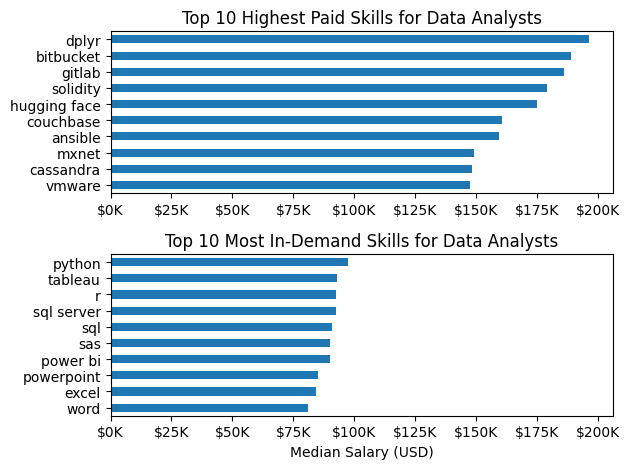

In [11]:
fig, ax = plt.subplots(2, 1)

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

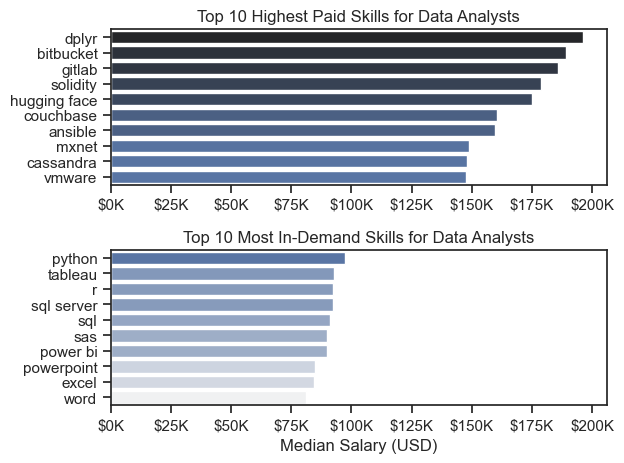

In [22]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
#df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

plt.tight_layout()
plt.show()

**For Historigram using seaborn**

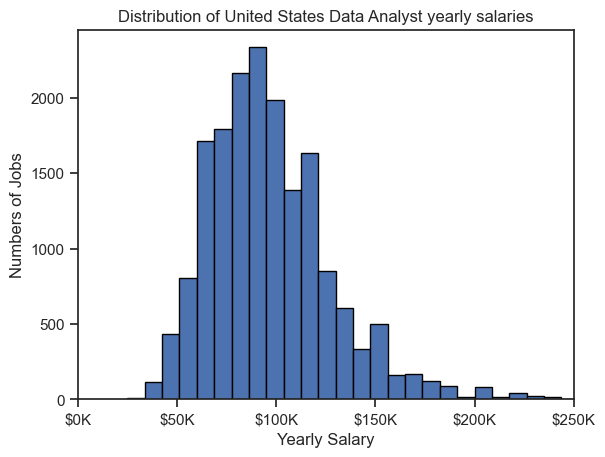

In [21]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst yearly salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Numbers of Jobs')

plt.show()

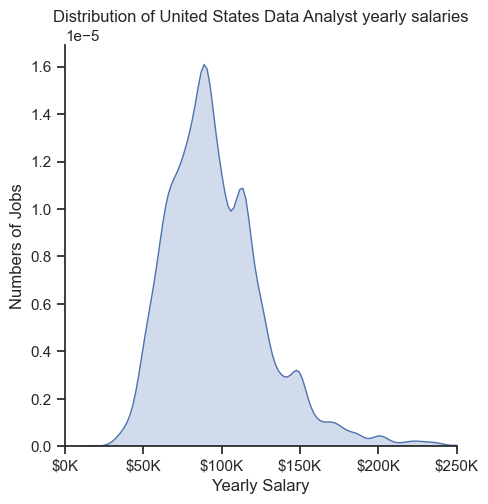

In [31]:

from textwrap import fill


sns.displot(data=df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst yearly salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Numbers of Jobs')

plt.show()

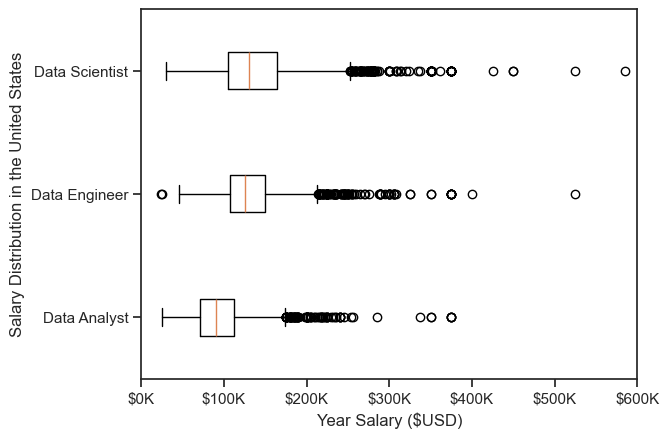

In [48]:


job_titles =['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)

plt.xlabel('Year Salary ($USD)')

plt.ylabel('Salary Distribution in the United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

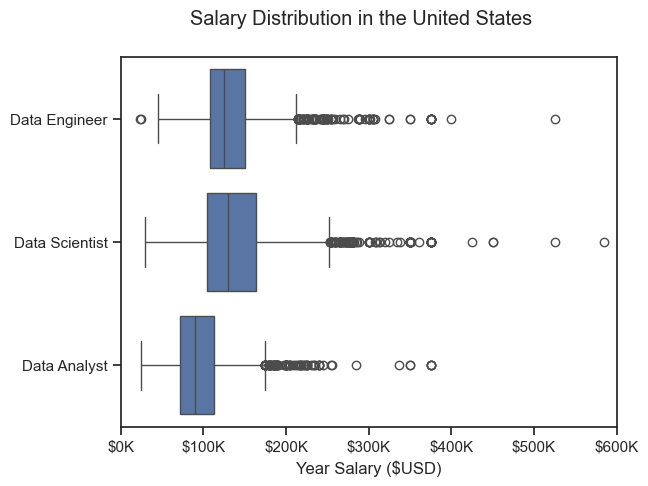

In [49]:

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.xlabel('Year Salary ($USD)')
plt.ylabel('')
plt.suptitle('Salary Distribution in the United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()